In [1]:
#To use google drive, I import my drive.
from google.colab import drive  
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm, tqdm_notebook
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *

#You can import other libraries if you want

In [3]:
###### DO NOT MODIFY THIS PART
seed = 42
os.environ['PYTHONHASHSEED']   = str(seed) # fix your random seed : In same model, you produce the same result
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed) 
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1) 
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)
######

In [4]:
artists = pd.read_csv('drive/MyDrive/Colab Notebooks/AIP2/new_train/train/artists.csv')
# Sort artists by number of paintings
artists = artists.sort_values(by=['paintings'], ascending=False)

# Create a dataframe with artists having more than 200 paintings
artists_top = artists[artists['paintings'] >= 200].reset_index()
artists_top = artists_top[['name', 'paintings']]

updated_name = "Albrecht_Dürer".replace("_", " ")
artists_top.iloc[4, 0] = updated_name

In [5]:
# Explore images of top artists
images_dir = 'drive/MyDrive/Colab Notebooks/AIP2/new_train/train/images' #Type Your Own Data Directory
artists_dirs = os.listdir(images_dir)
artists_top_name = artists_top['name'].str.replace(' ', '_').values

# See if all directories exist
for name in artists_top_name:    
    if os.path.exists(os.path.join(images_dir, name)):  # images_idr: directory folder // name: label (y) 
        print("find -->", os.path.join(images_dir, name))
    else:
        print("Did not find -->", os.path.join(images_dir, name))
# We can see that all image is found class by class.

find --> drive/MyDrive/Colab Notebooks/AIP2/new_train/train/images/Vincent_van_Gogh
find --> drive/MyDrive/Colab Notebooks/AIP2/new_train/train/images/Edgar_Degas
find --> drive/MyDrive/Colab Notebooks/AIP2/new_train/train/images/Pablo_Picasso
find --> drive/MyDrive/Colab Notebooks/AIP2/new_train/train/images/Pierre-Auguste_Renoir
find --> drive/MyDrive/Colab Notebooks/AIP2/new_train/train/images/Albrecht_Dürer
find --> drive/MyDrive/Colab Notebooks/AIP2/new_train/train/images/Paul_Gauguin
find --> drive/MyDrive/Colab Notebooks/AIP2/new_train/train/images/Francisco_Goya
find --> drive/MyDrive/Colab Notebooks/AIP2/new_train/train/images/Rembrandt
find --> drive/MyDrive/Colab Notebooks/AIP2/new_train/train/images/Alfred_Sisley
find --> drive/MyDrive/Colab Notebooks/AIP2/new_train/train/images/Titian
find --> drive/MyDrive/Colab Notebooks/AIP2/new_train/train/images/Marc_Chagall


In [6]:
batch_size =  30 #Type your own batch size
input_shape = [200,200]#Type your own input shape
n_classes = artists_top.shape[0]

#Image data generate with validation data fraction of 0.2 and data rescale 1/255.


# I made the 4004 images each artists in the "new_images" directory that is my own file.
# I use this imagedatagenerator to make more images in my new directory.

image_datagen = ImageDataGenerator(validation_split=0.2,
                                   width_shift_range=2/15,
                                   height_shift_range=1/10,
                                   rotation_range=30,
                                   rescale=1./255,
                                   
                      
                                   zoom_range = 0.5
                                   


                                   
                                   
                                   
                                  )






below 11 cells made the images as much as 4004 each artists.
in training, making images is not needed. So I hide it.

In [ ]:
#@title
# Data Augmentation about "Alfred_Sisley" -->4004 images
# I made it 1001 images at each trial and change the generator attribute. and then rerun this code. <-- this process is done 4 times.

image_generator_1 = image_datagen.flow_from_directory(directory="drive/MyDrive/Colab Notebooks/AIP2/new_train/train/images/Alfred_Sisley",
                                                      target_size=input_shape,
                                                      batch_size=1,
                                                      save_to_dir="drive/MyDrive/Colab Notebooks/AIP2/new_train/train/new_images/Alfred_Sisley_1",
                                                      save_prefix="a_3",
                                                      save_format="jpg")

i=0
for batch1 in image_generator_1: 
  i +=1
  if i > 1000:
        break

In [ ]:
#@title
# Data Augmentation about "Edgar_Degas" -->4004 images
image_generator_2 = image_datagen.flow_from_directory(directory="drive/MyDrive/Colab Notebooks/AIP2/new_train/train/images/Edgar_Degas",
                                                      target_size=input_shape,
                                                      batch_size=1,
                                                      save_to_dir="drive/MyDrive/Colab Notebooks/AIP2/new_train/train/new_images/Edgar_Degas_1",
                                                      save_prefix="bb_3",
                                                      save_format="jpg",
                                                      
                                                      
                                                      )

i=0
for batch2 in image_generator_2: 
  i +=1
  if i > 1000:
        break

In [ ]:
#@title
# Data Augmentation about "Francisco_Goya" -->4004 images
image_generator_3 = image_datagen.flow_from_directory(directory="drive/MyDrive/Colab Notebooks/AIP2/new_train/train/images/Francisco_Goya",
                                                      target_size=input_shape,
                                                      batch_size=1,
                                                      save_to_dir="drive/MyDrive/Colab Notebooks/AIP2/new_train/train/new_images/Francisco_Goya_1",
                                                      save_prefix="c_3",
                                                      save_format="jpg",
                                                      
                                                      )
i=0
for batch in image_generator_3: 
  i +=1
  if i > 1000:
        break

In [ ]:
#@title
# Data Augmentation about "Marc_Chagall" -->4004 images
image_generator_4 = image_datagen.flow_from_directory(directory="drive/MyDrive/Colab Notebooks/AIP2/new_train/train/images/Marc_Chagall",
                                                      target_size=input_shape,
                                                      batch_size=1,
                                                      save_to_dir="drive/MyDrive/Colab Notebooks/AIP2/new_train/train/new_images/Marc_Chagall_1",
                                                      save_prefix="d_3",
                                                      save_format="jpg"
                                                      )
i=0
for batch in image_generator_4: 
  i +=1
  if i > 1000:
        break

In [ ]:
#@title
# Data Augmentation about "Pablo_Picasso" -->4004 images
image_generator_5 = image_datagen.flow_from_directory(directory="drive/MyDrive/Colab Notebooks/AIP2/new_train/train/images/Pablo_Picasso",
                                                      target_size=input_shape,
                                                      batch_size=1,
                                                      save_to_dir="drive/MyDrive/Colab Notebooks/AIP2/new_train/train/new_images/Pablo_Picasso_1",
                                                      save_prefix="e_3",
                                                      save_format="jpg"
                                                      )
i=0
for batch in image_generator_5: 
  i +=1
  if i > 1000:
        break

In [ ]:
#@title
# Data Augmentation about "Paul_Gauguin" -->4004 images
image_generator_6 = image_datagen.flow_from_directory(directory="drive/MyDrive/Colab Notebooks/AIP2/new_train/train/images/Paul_Gauguin",
                                                      target_size=input_shape,
                                                      batch_size=1,
                                                      save_to_dir="drive/MyDrive/Colab Notebooks/AIP2/new_train/train/new_images/Paul_Gauguin_1",
                                                      save_prefix="f_3",
                                                      save_format="jpg",
                                                      )
i=0
for batch in image_generator_6: 
  i +=1
  if i > 1000:
        break

In [ ]:
#@title
# Data Augmentation about "Pierre-Auguste_Renoir" -->4004 images
image_generator_7 = image_datagen.flow_from_directory(directory="drive/MyDrive/Colab Notebooks/AIP2/new_train/train/images/Pierre-Auguste_Renoir",
                                                      target_size=input_shape,
                                                      batch_size=1,
                                                      save_to_dir="drive/MyDrive/Colab Notebooks/AIP2/new_train/train/new_images/Pierre-Auguste_Renoir_1",
                                                      save_prefix="g_3",
                                                      save_format="jpg",
                                                      
                                                      )
i=0
for batch in image_generator_7: 
  i +=1
  if i > 1000:
        break

In [ ]:
#@title
# Data Augmentation about "Rembrandt" -->4004 images
image_generator_8 = image_datagen.flow_from_directory(directory="drive/MyDrive/Colab Notebooks/AIP2/new_train/train/images/Rembrandt",
                                                      target_size=input_shape,
                                                      save_to_dir="drive/MyDrive/Colab Notebooks/AIP2/new_train/train/new_images/Rembrandt_1",
                                                      save_prefix="h_3",
                                                      save_format="jpg",
                                                      batch_size=1,
                                                      )
i=0
for batch in image_generator_8: 
  i +=1
  if i > 1000:
        break

In [ ]:
#@title
# Data Augmentation about "Titian" -->4004 images
image_generator_9 = image_datagen.flow_from_directory(directory="drive/MyDrive/Colab Notebooks/AIP2/new_train/train/images/Titian",
                                                      target_size=input_shape,
                                                      save_to_dir="drive/MyDrive/Colab Notebooks/AIP2/new_train/train/new_images/Titian_1",
                                                      save_prefix="i_3",
                                                      save_format="jpg",
                                                      batch_size=1,
                                                      )
i=0
for batch in image_generator_9: 
  i +=1
  if i > 1000:
        break

In [ ]:
#@title
# Data Augmentation about "Vincent_van_Gogh" -->4004 images
image_generator_10 = image_datagen.flow_from_directory(directory="drive/MyDrive/Colab Notebooks/AIP2/new_train/train/images/Vincent_van_Gogh",
                                                      target_size=input_shape,
                                                       save_to_dir="drive/MyDrive/Colab Notebooks/AIP2/new_train/train/new_images/Vincent_van_Gogh_1",
                                                      save_prefix="j_3",
                                                      save_format="jpg",
                                                      batch_size=1
                                                      )
i=0
for batch in image_generator_10: 
  i +=1
  if i > 1000:
        break

Found 0 images belonging to 0 classes.


In [ ]:
#@title
image_generator_11 = image_datagen.flow_from_directory(directory="drive/MyDrive/Colab Notebooks/AIP2/new_train/train/images/Albrecht_Dürer",
                                                      target_size=input_shape,
                                                      batch_size=1,
                                                      save_to_dir="drive/MyDrive/Colab Notebooks/AIP2/new_train/train/new_images/Albrecht_Dürer_1",
                                                      save_prefix="k_3",
                                                      save_format="jpg")

i=0
for batch1 in image_generator_11: 
  i +=1
  if i > 1000:
        break

Found 288 images belonging to 1 classes.


In [7]:
# I already augmented the image data. So, in training, I just use little attribute about it.
train_datagen = ImageDataGenerator(validation_split=0.2,
                                   
                                   
                                   )

In [8]:
# Thanks to dlow_from_directory, I can choose the images as much as batch_size by fitting class's name automatically. 
batch_size =  30
# I have more images on directory and same number of images about each artists.
# to increase the val_accuracy, "keep_aspect_ratio" attribute is added.
train_generator = train_datagen.flow_from_directory(directory="drive/MyDrive/Colab Notebooks/AIP2/new_train/train/new_images",
                                                    class_mode='categorical',
                                                    target_size=input_shape,
                                                    batch_size=batch_size,
                                                   
                                                    color_mode="rgb",
                                                    keep_aspect_ratio=True,
                                                    subset="training",
                                                    shuffle=True,
                                                    classes=artists_top_name.tolist(),
                                                    
                                                   )

valid_generator = train_datagen.flow_from_directory(directory="drive/MyDrive/Colab Notebooks/AIP2/new_train/train/new_images",
                                                    class_mode='categorical',
                                                    target_size=input_shape,
                                                    batch_size=batch_size,
                                                    color_mode="rgb",
                                                    keep_aspect_ratio=True,
                                                    subset="validation",
                                                    shuffle=True,
                                                    classes=artists_top_name.tolist(),
                                                    
                                                   )

STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
print("Total number of batches =", STEP_SIZE_TRAIN, "and", STEP_SIZE_VALID)

Found 35244 images belonging to 11 classes.
Found 8800 images belonging to 11 classes.
Total number of batches = 1174 and 293


In [9]:
# I use the ResNet34. because more complicated model shows high overfitting. So to reduce the overfitting, I have to use simple model like ResNet34 not ResNet50 etc..
class ResNet34_class(keras.layers.Layer): # ResNet-34
  def __init__(self, filters, strides=1, activation="relu", **kwargs):
    super().__init__(**kwargs)
    self.activation = keras.activations.get(activation) # relu activation in this example
    self.main_layers = [
      keras.layers.Conv2D(filters, 3, strides=strides, padding="same", use_bias=False),
      keras.layers.BatchNormalization(),
      self.activation,
      keras.layers.Conv2D(filters, 3, strides=1, padding="same", use_bias=False),
      keras.layers.BatchNormalization()]
    self.skip_layers = [] # to make short cut

    if strides > 1: 
      self.skip_layers = [
        keras.layers.Conv2D(filters, 1, strides=strides, padding="same", use_bias=False),
      keras.layers.BatchNormalization()]
      
  def call(self, inputs):
    Z = inputs
    skip_Z = inputs

    for layer in self.main_layers:
      Z = layer(Z)
      
    for layer in self.skip_layers: # adding short-cut
      skip_Z = layer(skip_Z)
      
    return self.activation(Z + skip_Z)


#Your Own code




In [10]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(64, 7, strides=2, input_shape=[200, 200, 3], padding="same", use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same"))

prev_filters = 0
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
  # [64, 64, 64, 128, 128, 128, 128, 256, 256, 256, 256, 256, 256, 512, 512, 512]
  strides = 1 if filters == prev_filters else 2
  model.add(ResNet34_class(filters, strides=strides)) 
  prev_filters = filters
  
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5)) #to reduce overfitting, I added "dropout"
model.add(keras.layers.Dense(n_classes, activation="softmax"))


In [11]:


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      9408      
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 64)       0         
 )                                                               
                                                                 
 res_net34_class (ResNet34_c  (None, 25, 25, 64)       78592     
 lass)                                                           
                                                        

In [11]:
# to reduce the learning time and overffiting I used the early_stopping_cb. 
# Additionally, it restore the best weights before overfitting is higher. 
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)


In [12]:
# this is learning rate scheduling
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9)

In [13]:
#training

n_epoch = 50 #Your Own Epoch num
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),metrics=["accuracy"])
history = model.fit_generator(generator=train_generator, steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=valid_generator, validation_steps=STEP_SIZE_VALID,
                              epochs=n_epoch,callbacks=[early_stopping_cb]) #you can add kwargs if you want

Epoch 1/50


<ipython-input-13-f8fa26f2c479>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator, steps_per_epoch=STEP_SIZE_TRAIN,


1174/1174 [==============================] - 152s 123ms/step - loss: 1.7941 - accuracy: 0.4215 - val_loss: 25.9504 - val_accuracy: 0.1484
Epoch 2/50
1174/1174 [==============================] - 140s 119ms/step - loss: 1.2382 - accuracy: 0.5769 - val_loss: 7.8199 - val_accuracy: 0.1673
Epoch 3/50
1174/1174 [==============================] - 140s 119ms/step - loss: 1.0281 - accuracy: 0.6530 - val_loss: 1.6309 - val_accuracy: 0.5027
Epoch 4/50
1174/1174 [==============================] - 140s 119ms/step - loss: 0.8391 - accuracy: 0.7154 - val_loss: 1.0149 - val_accuracy: 0.6914
Epoch 5/50
1174/1174 [==============================] - 139s 118ms/step - loss: 0.6635 - accuracy: 0.7735 - val_loss: 1.0192 - val_accuracy: 0.6990
Epoch 6/50
1174/1174 [==============================] - 137s 117ms/step - loss: 0.5141 - accuracy: 0.8263 - val_loss: 1.1596 - val_accuracy: 0.6452
Epoch 7/50
1174/1174 [==============================] - 139s 118ms/step - loss: 0.3948 - accuracy: 0.8671 - val_loss: 0.79

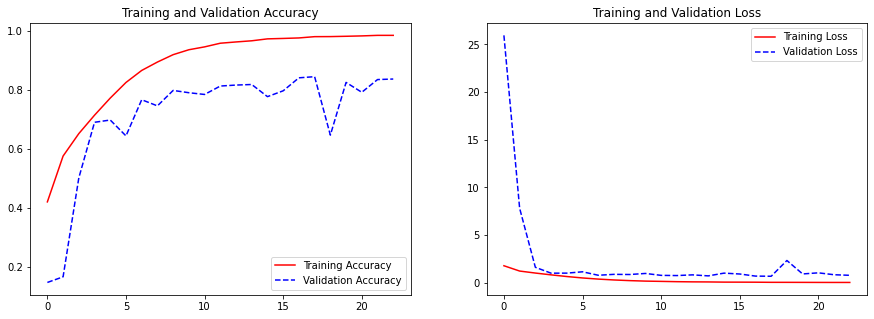

In [14]:
his = {}
his['loss'] = history.history['loss']
his['accuracy'] = history.history['accuracy'] 
his['val_loss'] = history.history['val_loss']
his['val_accuracy'] = history.history['val_accuracy']

# Plot the training graph
def plot_training(history):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    epochs = range(len(acc))

    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    
    axes[0].plot(epochs, acc, 'r-', label='Training Accuracy')
    axes[0].plot(epochs, val_acc, 'b--', label='Validation Accuracy')
    axes[0].set_title('Training and Validation Accuracy')
    axes[0].legend(loc='best')

    axes[1].plot(epochs, loss, 'r-', label='Training Loss')
    axes[1].plot(epochs, val_loss, 'b--', label='Validation Loss')
    axes[1].set_title('Training and Validation Loss')
    axes[1].legend(loc='best')
    
    plt.show()
    
plot_training(his)

In [15]:
model.save("drive/MyDrive/Colab Notebooks/AIP2/new_train/train/20201175_Adam_exponential")